In [ ]:
#this is me trying to make my first nerual network, so a thousand apologies if the code is bad

In [83]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch.optim as optim
import matplotlib.pyplot as plt

In [79]:
#importing data
x = pd.read_csv('Iris.csv')
le = LabelEncoder()
x['encoded'] = le.fit_transform(x['Species'])
y = x['encoded']
x = x.drop(columns=['Species','Id','encoded'])
x=np.array(x,dtype=np.float32)
y=np.array(y)
X = torch.from_numpy(x)
Y = torch.from_numpy(y)

In [80]:
#model defination
class model(nn.Module):

    def __init__(self,input,output):
        super(model,self).__init__()
        self.layer1=nn.Linear(input,4)
        self.layer2=nn.Linear(4,6)
        self.layer3=nn.Linear(6,output)

    def forward(self,X):
        out=F.relu(self.layer1(X))
        out=F.relu(self.layer2(out))
        return self.layer3(out)

net = model(4,3)

#hyperparameters
n_epochs=1000
learning_rate=0.001
loss=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=learning_rate)

Epoch [100], Loss: 0.0504
Epoch [200], Loss: 0.0495
Epoch [300], Loss: 0.0487
Epoch [400], Loss: 0.0479
Epoch [500], Loss: 0.0471
Epoch [600], Loss: 0.0465
Epoch [700], Loss: 0.0458
Epoch [800], Loss: 0.0452
Epoch [900], Loss: 0.0446
Epoch [1000], Loss: 0.0441


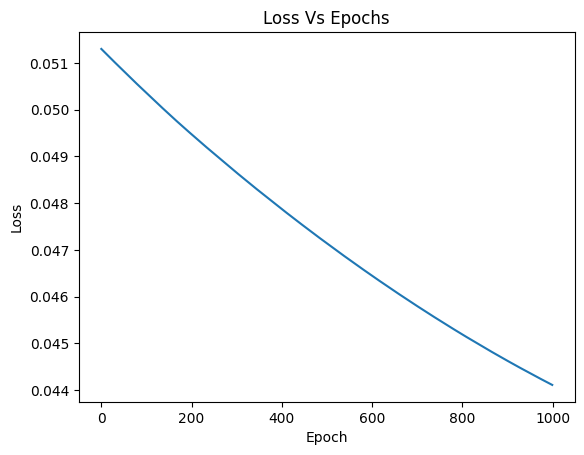

In [87]:
#dict for plottling loss
graph = {}

#training loop
for epoch in range(n_epochs):

    prediction = net(X)
    l=loss(prediction,Y)

    l.backward()
    optimizer.step()
    optimizer.zero_grad()

    graph[epoch]=l.item()

    if (epoch+1)%100==0:
        print(f"Epoch [{epoch+1}], Loss: {l.item():.4f}")

plt.title('Loss Vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(graph.keys(),graph.values())

In [88]:
#evaluation
net.eval()

with torch.no_grad():
    outputs = net(X)
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == Y).sum().item()
    total = Y.size(0)

    print(f"Training Accuracy: {100 * correct / total:.2f}%")

Training Accuracy: 98.67%
